In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data
df_cars = pd.read_excel('all_city_cars.xlsx')
df_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Seating Capacity,Steering Type,Tyre Type,Alloy Wheel Size,No Door Numbers,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,73 X 82 mm,11.0:1,No,No,NaN,NaN,NaN,NaN,NaN,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,79 X 76.5 mm,11.0:1,No,No,NaN,NaN,NaN,NaN,NaN,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,77 X 85.8 mm,10.8:1,No,No,NaN,NaN,NaN,NaN,NaN,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,69.6 x 82 mm,NaN,Yes,No,NaN,NaN,NaN,NaN,NaN,Bangalore


In [3]:
df_cars.describe()

,it,ownerNo,modelYear,centralVariantId,priceSaving,priceFixedText,Year of Manufacture,comfort_count,Safety_count,Entertainment_count,top_features_count,Displacement,No of Cylinder,Values per Cylinder,Seating Capacity,Alloy Wheel Size,No Door Numbers
count,8369.0,8369.000000,8369.000000,8369.000000,0.0,0.0,8349.000000,8369.000000,8369.000000,8369.000000,8369.000000,8365.000000,8338.000000,8318.000000,3.000000,2.000000,3.000000
mean,0.0,1.360139,2016.503286,4962.537340,NaN,NaN,2016.547850,15.609511,22.838451,6.684909,8.785160,1424.735923,3.802471,3.934359,6.333333,15.500000,3.333333
std,0.0,0.641958,3.921465,2747.040479,NaN,NaN,3.811882,6.529495,7.287703,3.470996,0.911979,477.629144,0.594613,0.792698,1.527525,0.707107,0.577350
min,0.0,0.000000,1985.000000,5.000000,NaN,NaN,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,5.000000,15.000000,3.000000
25%,0.0,1.000000,2014.000000,2042.000000,NaN,NaN,2014.000000,11.000000,19.000000,5.000000,9.000000,1197.000000,4.000000,4.000000,5.500000,15.250000,3.000000
50%,0.0,1.000000,2017.000000,5320.000000,NaN,NaN,2017.000000,15.000000,23.000000,7.000000,9.000000,1248.000000,4.000000,4.000000,6.000000,15.500000,3.000000
75%,0.0,2.000000,2019.000000,7121.000000,NaN,NaN,2019.000000,20.000000,28.000000,9.000000,9.000000,1498.000000,4.000000,4.000000,7.000000,15.750000,3.500000
max,0.0,5.000000,2023.000000,11098.000000,NaN,NaN,2023.000000,37.000000,48.000000,21.000000,9.000000,5000.000000,23.000000,69.000000,8.000000,16.000000,4.000000


In [4]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   it                    8369 non-null   int64  
 1   ft                    8369 non-null   object 
 2   bt                    8365 non-null   object 
 3   km                    8369 non-null   object 
 4   transmission          8369 non-null   object 
 5   ownerNo               8369 non-null   int64  
 6   owner                 8369 non-null   object 
 7   oem                   8369 non-null   object 
 8   model                 8369 non-null   object 
 9   modelYear             8369 non-null   int64  
 10  centralVariantId      8369 non-null   int64  
 11  variantName           8369 non-null   object 
 12  price                 8369 non-null   object 
 13  priceActual           1670 non-null   object 
 14  priceSaving           0 non-null      float64
 15  priceFixedText       

In [5]:
# these columns have no potential contribution to price
df_cars.drop(['priceSaving', 'priceFixedText', 'Seating Capacity', 'Steering Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers'], axis=1, inplace=True)

In [6]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   it                    8369 non-null   int64  
 1   ft                    8369 non-null   object 
 2   bt                    8365 non-null   object 
 3   km                    8369 non-null   object 
 4   transmission          8369 non-null   object 
 5   ownerNo               8369 non-null   int64  
 6   owner                 8369 non-null   object 
 7   oem                   8369 non-null   object 
 8   model                 8369 non-null   object 
 9   modelYear             8369 non-null   int64  
 10  centralVariantId      8369 non-null   int64  
 11  variantName           8369 non-null   object 
 12  price                 8369 non-null   object 
 13  priceActual           1670 non-null   object 
 14  trendingText.imgUrl   8369 non-null   object 
 15  trendingText.heading 

In [7]:
# redundant and irrelevant columns are dropped
df_cars.drop(['priceActual', 'trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc', 'Registration Year', 'Year of Manufacture'], axis=1, inplace=True)


-- As the priceActual column has null values more than 70%, the column is deleted

-- Registration year and year of Manufacture is redundant as there is already Model Year.

-- trending image, heading and desc is less significantly important for price prediction.

In [8]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   it                   8369 non-null   int64  
 1   ft                   8369 non-null   object 
 2   bt                   8365 non-null   object 
 3   km                   8369 non-null   object 
 4   transmission         8369 non-null   object 
 5   ownerNo              8369 non-null   int64  
 6   owner                8369 non-null   object 
 7   oem                  8369 non-null   object 
 8   model                8369 non-null   object 
 9   modelYear            8369 non-null   int64  
 10  centralVariantId     8369 non-null   int64  
 11  variantName          8369 non-null   object 
 12  price                8369 non-null   object 
 13  Insurance Validity   8365 non-null   object 
 14  Fuel Type            8369 non-null   object 
 15  Seats                8363 non-null   o

In [9]:
df_cars[df_cars['No of Cylinder'] == 23.0]

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,City
839,0,Electric,Hatchback,"20,000",Automatic,2,2nd Owner,Mahindra,Mahindra e2o Plus,2017,...,91Nm@2500 rpm,23.0,69.0,23 Modules 69 Cells,3 Phase AC Induction Motors,NaN,NaN,No,No,Bangalore


In [10]:
df_cars['No of Cylinder'] = df_cars['No of Cylinder'].replace(23.0, 2)

In [11]:
# again removing all redundant and less relevant features
df_cars.drop(['Values per Cylinder', 'Value Configuration', 'Compression Ratio', 'Fuel Suppy System', 'BoreX Stroke', 'Engine Type', 'Displacement', 'comfort_count', 'Entertainment_count', 'Engine Displacement', 'Ownership', 'RTO', 'Kms Driven', 'centralVariantId', 'variantName', 'owner', 'Transmission','ft'], axis=1, inplace=True)

In [12]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   it                  8369 non-null   int64  
 1   bt                  8365 non-null   object 
 2   km                  8369 non-null   object 
 3   transmission        8369 non-null   object 
 4   ownerNo             8369 non-null   int64  
 5   oem                 8369 non-null   object 
 6   model               8369 non-null   object 
 7   modelYear           8369 non-null   int64  
 8   price               8369 non-null   object 
 9   Insurance Validity  8365 non-null   object 
 10  Fuel Type           8369 non-null   object 
 11  Seats               8363 non-null   object 
 12  Safety_count        8369 non-null   int64  
 13  top_features_count  8369 non-null   int64  
 14  Color               8366 non-null   object 
 15  Max Power           8309 non-null   object 
 16  Max To

In [13]:
df_cars.isna().sum()

,0
it,0
bt,4
km,0
transmission,0
ownerNo,0
oem,0
model,0
modelYear,0
price,0
Insurance Validity,4


<Axes: >

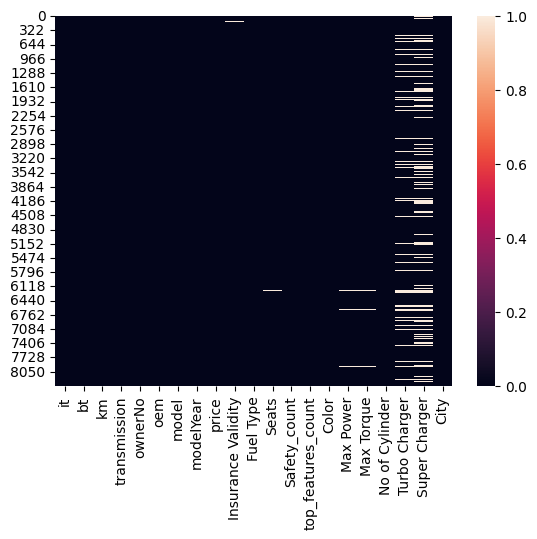

In [14]:
sns.heatmap(df_cars.isna())

In [15]:
# drop null values in Max Power column
df_cars.dropna(subset=['Max Power'], inplace=True)

In [16]:
df_cars.isna().sum()

,0
it,0
bt,4
km,0
transmission,0
ownerNo,0
oem,0
model,0
modelYear,0
price,0
Insurance Validity,4


In [17]:
# drop null values
df_cars.dropna(subset=['No of Cylinder', 'bt', 'Seats'], inplace=True)

In [18]:
df_cars.isna().sum()

,0
it,0
bt,0
km,0
transmission,0
ownerNo,0
oem,0
model,0
modelYear,0
price,0
Insurance Validity,4


In [19]:
# change all strings in this column to lowercase
df_cars['Turbo Charger'] = df_cars['Turbo Charger'].str.lower()
df_cars['Turbo Charger'].value_counts()

,count
Turbo Charger,
no,4257
yes,3014
twin,53
turbo,2


In [20]:
df_cars['Super Charger'] = df_cars['Super Charger'].str.lower()
df_cars['Super Charger'].value_counts()

,count
Super Charger,
no,6386
yes,17


In [21]:
# impute all the null values in this column to 'no'
df_cars['Turbo Charger'] = df_cars['Turbo Charger'].fillna('no')

# same as well as in super charger
df_cars['Super Charger'] = df_cars['Super Charger'].fillna('no')

In [22]:
df_cars.isna().sum()

,0
it,0
bt,0
km,0
transmission,0
ownerNo,0
oem,0
model,0
modelYear,0
price,0
Insurance Validity,4


In [23]:
df_cars['Insurance Validity'] = df_cars['Insurance Validity'].str.lower()
df_cars['Insurance Validity'].value_counts()

,count
Insurance Validity,
third party insurance,3994
comprehensive,3131
third party,626
zero dep,302
not available,215
1,3
2,1


In [24]:
# change insurance validity 1 to 1st party
df_cars['Insurance Validity'] = df_cars['Insurance Validity'].replace('1', '1st party')
# and for 2, 2nd party
df_cars['Insurance Validity'] = df_cars['Insurance Validity'].replace('2', '2nd party')

In [25]:
# impute null in insurance to not available
df_cars['Insurance Validity'] = df_cars['Insurance Validity'].fillna('not available')

In [26]:
df_cars.isna().sum()

,0
it,0
bt,0
km,0
transmission,0
ownerNo,0
oem,0
model,0
modelYear,0
price,0
Insurance Validity,0


In [27]:
df_cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,third party insurance,...,5 Seats,13,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,comprehensive,...,5 Seats,27,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,comprehensive,...,5 Seats,24,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,comprehensive,...,5 Seats,18,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,third party insurance,...,5 Seats,22,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore


In [28]:
# convert price from string to numeric
df_cars['price'] = df_cars['price'].str.extract(r'(\d+\.?\d*)').astype(float)
df_cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5 Seats,13,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5 Seats,27,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5 Seats,24,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5 Seats,18,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5 Seats,22,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore


In [29]:
# change column name of price
df_cars.rename(columns={'price': 'price_in_lakhs'}, inplace=True)

In [30]:
# converting seats from string to numeric
df_cars['Seats'] = df_cars['Seats'].str.extract(r'(\d+)').astype(int)
df_cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5,13,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5,27,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5,24,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5,18,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5,22,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore


In [31]:
# Extract power and torque
df_cars['Power'] = df_cars['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
# df_cars['Power'] = df_cars['Max Power'].str.extract(r'(\d+\.?\d*)\s*(?:bhp|PS)?\s*(?:@|at)?\s*(?:\d+)*\s*(?:rpm|\(PS@rpm\))?')
df_cars['Torque'] = df_cars['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df_cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City,Power,Torque
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore,67.04,90.00
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore,121.31,150.00
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore,84.00,114.00
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore,81.86,113.75
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore,88.50,200.00


In [32]:
df_cars.drop(['Max Power', 'Max Torque'], axis=1, inplace=True)

In [33]:

df_cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,No of Cylinder,Turbo Charger,Super Charger,City,Power,Torque
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5,13,8,White,3.0,no,no,Bangalore,67.04,90.00
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5,27,9,White,3.0,no,no,Bangalore,121.31,150.00
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5,24,9,Red,3.0,no,no,Bangalore,84.00,114.00
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5,18,9,Others,4.0,no,no,Bangalore,81.86,113.75
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5,22,9,Gray,4.0,yes,no,Bangalore,88.50,200.00


In [34]:
# turn the km column dtype to int
df_cars['km'] = df_cars['km'].str.replace(',', '').astype(int)
df_cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,No of Cylinder,Turbo Charger,Super Charger,City,Power,Torque
0,0,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5,13,8,White,3.0,no,no,Bangalore,67.04,90.00
1,0,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5,27,9,White,3.0,no,no,Bangalore,121.31,150.00
2,0,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5,24,9,Red,3.0,no,no,Bangalore,84.00,114.00
3,0,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5,18,9,Others,4.0,no,no,Bangalore,81.86,113.75
4,0,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5,22,9,Gray,4.0,yes,no,Bangalore,88.50,200.00


In [35]:
df_cars['km'].dtype

dtype('int64')

In [36]:
# now save this cleaned data locally for further process
df_cars.to_csv('cleaned_cars_data.csv', index=False)